# Parte 2

## Task 1

Considere un experimento en el cual se cuentan cuántos carros pasan por una calle determinada dentro de un rango de tiempo dado. Sabemos que el tiempo de espera para el n-ésimo evento puede ser modelando a través de una variable gamma. Considere el caso en el que usted está esperando que pase el 3er carro en la calle dada.
1. Para diferentes lambdas en [2, 1, 0.5], grafique las distribuciones gamma para cada uno de los casos.
2. ¿Qué conclusiones puede obtener de las gráficas obtenidas en términos de los tiempos de espera y el número de ocurrencias del evento? ¿Qué relación existe entre el tiempo de espera y el número de ocurrencias de un evento?


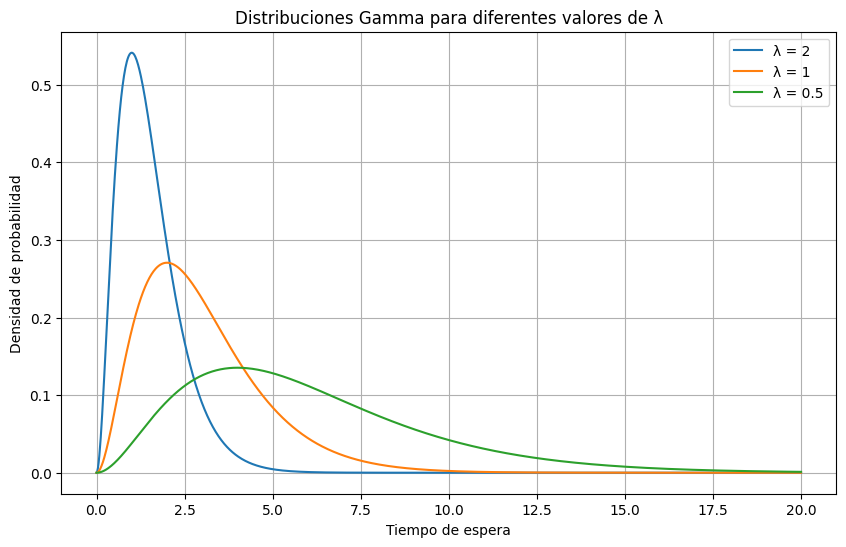

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma

# valores lambda
lambdas = [2, 1, 0.5]

# valor del numero de ocurrencias
k = 3


# Crear una figura para las gráficas
plt.figure(figsize=(10, 6))

# Generar y graficar las distribuciones gamma para cada lambda
for lam in lambdas:
    theta = 1 / lam  # Parámetro de escala
    x = np.linspace(0, 20, 1000)
    y = gamma.pdf(x, k, scale=theta)
    plt.plot(x, y, label=f'λ = {lam}')

# Configurar la gráfica
plt.title('Distribuciones Gamma para diferentes valores de λ')
plt.xlabel('Tiempo de espera')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

**Conclusiones**

Es posible observar que, a medida que el valor de lambda λ aumenta, la densidad de probabilidad se vuelve mas pronunciada y se desplaza hacia la izquierda. Esto indica tiempos de espera mas cortos hasta completar las 3 ocurrencias. En otras palabras, a mayor λ, menos timepo se debe esperar para observar la tercera ocurrencia. Por otro lado, a medida que λ disminuye, los eventos son menos frecuentes. 

## Task 02

In [1]:
import random

random.seed(1)

# Generador 1 - Lineal Congruencial
def generador_1(semilla=1, a=1664525, c=1013904223, m=2**32):
    x = semilla
    while True:
        x = (a * x + c) % m
        yield x / m  # Normalizamos el valor para que esté en el rango [0, 1]

# Generador 2 - Fibonacci Modificado
def generador_2(semilla1=1, semilla2=1, m=2**32):
    x1, x2 = semilla1, semilla2
    while True:
        x = (x1 + x2) % m
        x1, x2 = x2, x  # Avanzamos las semillas
        yield x / m  # Normalizamos el valor para que esté en el rango [0, 1]

# Generador 3 - Uniforme (Baseline)
def generador_3():
    return random.uniform(0, 1)



In [13]:
# Función para generar histogramas y calcular porcentajes
def generar_histograma(valores, titulo, mostrar_grafico=True):
    histograma = [0] * 10
    total = len(valores)
    
    # Contamos los valores en cada intervalo
    for valor in valores:
        indice = int(valor * 10)
        if indice == 10:
            indice = 9
        histograma[indice] += 1
    
    if mostrar_grafico:
        print(f"\n{titulo}")
        for i in range(10):
            rango = f"[{i/10:.1f}, {(i+1)/10:.1f})"
            cantidad = histograma[i]
            porcentaje = (cantidad / total) * 100
            print(f"{rango}: {cantidad} ({porcentaje:.2f}%) {'*' * cantidad}")
    
    return histograma, total

# Función principal para realizar los experimentos
def realizar_experimentos():
    repeticiones = [100, 5000, 100000]
    generadores = [generador_1, generador_2, generador_3]
    nombres_generadores = ["Generador 1", "Generador 2", "Generador 3"]

    resumen_resultados = []

    for rep in repeticiones:
        print(f"\nComparación con {rep} repeticiones:")
        for i, generador_func in enumerate(generadores):
            # Inicializamos el generador para los generadores 1 y 2
            if i < 2:
                generador = generador_func()
                valores = [next(generador) for _ in range(rep)]
            else:
                # Para el generador 3, llamamos la función directamente
                valores = [generador_func() for _ in range(rep)]
            
            # Generamos y mostramos el histograma con asteriscos
            histograma, total = generar_histograma(valores, nombres_generadores[i])
            resumen_resultados.append((nombres_generadores[i], rep, histograma, total))

    # Mostrar el resumen final sin los asteriscos
    print("\nResumen Final (sin representación gráfica):")
    for nombre, rep, histograma, total in resumen_resultados:
        print(f"\nGenerador: {nombre} | Repeticiones: {rep}")
        for i in range(10):
            rango = f"[{i/10:.1f}, {(i+1)/10:.1f})"
            cantidad = histograma[i]
            porcentaje = (cantidad / total) * 100
            print(f"{rango}: {cantidad} ({porcentaje:.2f}%)")

# Ejecutamos los experimentos
realizar_experimentos()


Comparación con 100 repeticiones:

Generador 1
[0.0, 0.1): 9 (9.00%) *********
[0.1, 0.2): 14 (14.00%) **************
[0.2, 0.3): 9 (9.00%) *********
[0.3, 0.4): 8 (8.00%) ********
[0.4, 0.5): 10 (10.00%) **********
[0.5, 0.6): 10 (10.00%) **********
[0.6, 0.7): 8 (8.00%) ********
[0.7, 0.8): 6 (6.00%) ******
[0.8, 0.9): 16 (16.00%) ****************
[0.9, 1.0): 10 (10.00%) **********

Generador 2
[0.0, 0.1): 43 (43.00%) *******************************************
[0.1, 0.2): 9 (9.00%) *********
[0.2, 0.3): 4 (4.00%) ****
[0.3, 0.4): 5 (5.00%) *****
[0.4, 0.5): 6 (6.00%) ******
[0.5, 0.6): 6 (6.00%) ******
[0.6, 0.7): 8 (8.00%) ********
[0.7, 0.8): 10 (10.00%) **********
[0.8, 0.9): 4 (4.00%) ****
[0.9, 1.0): 5 (5.00%) *****

Generador 3
[0.0, 0.1): 7 (7.00%) *******
[0.1, 0.2): 13 (13.00%) *************
[0.2, 0.3): 10 (10.00%) **********
[0.3, 0.4): 12 (12.00%) ************
[0.4, 0.5): 9 (9.00%) *********
[0.5, 0.6): 6 (6.00%) ******
[0.6, 0.7): 10 (10.00%) **********
[0.7, 0.8): 7 (7

### ¿Qué generador le parece mejor? (considere solamente Generador 1 y Generador 2) ¿Por qué?
En general tanto el generador 1 como el generador 2 se comportan de muy buena manera, sin embargo lo que se espera en este tipo de generadores es que cada uno de los intervalos tenga la misma probabilidad de ser elegida, es decir que muestren un comportamiento uniforme entre sus posibles resultados. Esto en las pruebas se puede observar que se cumple para ambos generadores, cuando se ejecuta un número significativo de veces, es decir para las pruebas con 5000 y 100000, sin embargo en el caso de que se haga un número más limitado de repeticiones, es decir para el caso de 100 muestras, podemos ver que el generador 1 se comporta de manera superior, es más uniforme, que generador 2, ya que se espera que todos los intervalos tengan un aproximado del 10% del total, vemos que el generador 1, casi todos los intervalos siguen estas regla, exceptuando los valores atípicos de 16% y 14%, sin embargo el generador 2, posee un valor de 43% para el primer intervalo, dejando en claro que para estos casos, no presenta una distribución uniforme. 

## Task 03
Considere la siguiente integral y responda
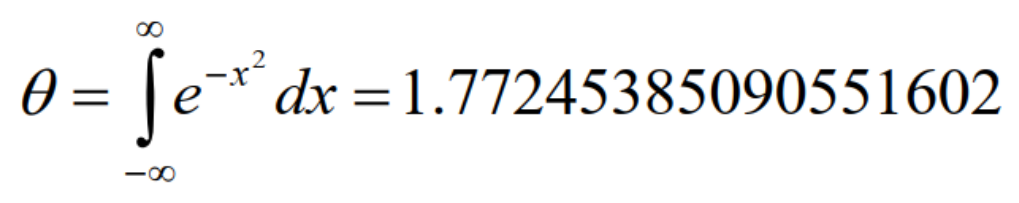

### Transforme la integral a una con límites de 0 a 1, muestre su procedimiento
Para poder hacer la transformación, se debe utilizar el cambio de variable siguiente:

$ x = \tan(\frac{\pi}{2} t) $ donde $t \in [0,1] $.

Esto nos permite transformar los límites de integración de $ x \in (-\infty, \infty) $ a $ t \in [0,1] $.

El diferencial se calcula de la siguiente manera:

$ dx = \frac{\pi}{2} \sec^2(\frac{\pi}{2}t) \, dt $

Por lo tanto, la integral se convierte en:

$ \theta = \int_{0}^{1} e^{-\tan^2(\frac{\pi}{2} t)} \cdot \frac{\pi}{2} \sec^2(\frac{\pi}{2} t) \, dt $.


### Aproxime la integral usando el método de Montecarlo, haciendo 100, 10,000 y 100,000 iteraciones.

In [42]:
import numpy as np
np.random.seed(1)

def f(t):
    return np.exp(-np.tan(np.pi*t/2)**2) * (np.pi/2) * (1/np.cos(np.pi*t/2))**2


def monte_carlo_integration(n):
    t = np.random.uniform(0, 1, n)
    y = f(t)
    integral = np.mean(y)
    return 2 * integral

n_values = [100, 10000, 100000]

for n in n_values:
    approximation = monte_carlo_integration(n)
    print(f"Aproximación con {n} iteraciones: {approximation}")

real_value = np.sqrt(np.pi)
print(f"Valor real: {real_value}")

Aproximación con 100 iteraciones: 1.8026206157624733
Aproximación con 10000 iteraciones: 1.7768520359977946
Aproximación con 100000 iteraciones: 1.7718047405859376
Valor real: 1.7724538509055159


## Task 4

Considere la siguiente integral y responda

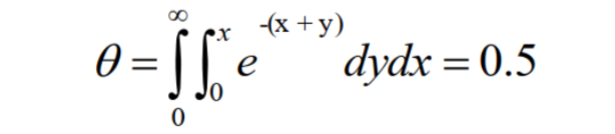

1. Transforme la integral múltiple a una en la que ambos límites sean de 0 a 1, muestre su procedimiento
2. Aproxime la integral usando el método de Montecarlo, haciendo 100, 10,000 y 100,000 iteraciones

## 1. Transformación de la Integral

### Paso 1: Cambio de Variables
Para transformar los límites de integración a 0 y 1, proponemos el siguiente cambio de variables:

$$
u = \frac{x}{1-x} \quad \text{y} \quad v = \frac{y}{1-y}
$$

Con este cambio:

- Cuando \( x \) varía de \( 0 \) a \( $\infty$ \), \( u \) varía de \( 0 \) a \( 1 \).
- Cuando \( y \) varía de \( 0 \) a \( x \), \( v \) varía de \( 0 \) a \( 1 \).


### Paso 2: Jacobiano
El Jacobiano del cambio de variables es:

$$
\frac{\partial(u,v)}{\partial(x,y)} = \frac{1}{(1-x)^2} \cdot \frac{1}{(1-y)^2}
$$

### Paso 3: Transformación de la Integral
Sustituyendo el cambio de variables y el Jacobiano, la integral se transforma en:

$$
\theta = \int_{0}^{1} \int_{0}^{1} \frac{e^{-\left(\frac{u}{1-u} + \frac{v}{1-v}\right)}}{(1-u)^2 \cdot (1-v)^2} \, dv \, du
$$


In [1]:
import numpy as np

def montecarlo_integration(n):
    samples = np.random.rand(n, 2)
    x = samples[:, 0] / (1 - samples[:, 0])
    y = samples[:, 1] / (1 - samples[:, 1])
    integrand = np.exp(-(x + y)) / ((1 - samples[:, 0]) * (1 - samples[:, 1]))
    return np.mean(integrand)

iterations = [100, 10000, 100000]
results = {}

for it in iterations:
    result = montecarlo_integration(it)
    results[it] = result
    print(f'Iteraciones: {it}, Aproximación: {result}')


Iteraciones: 100, Aproximación: 0.41943907175053513
Iteraciones: 10000, Aproximación: 0.3620165943083436
Iteraciones: 100000, Aproximación: 0.35431676281280394


# Parte 3

## Task 01

C:\Users\caste\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


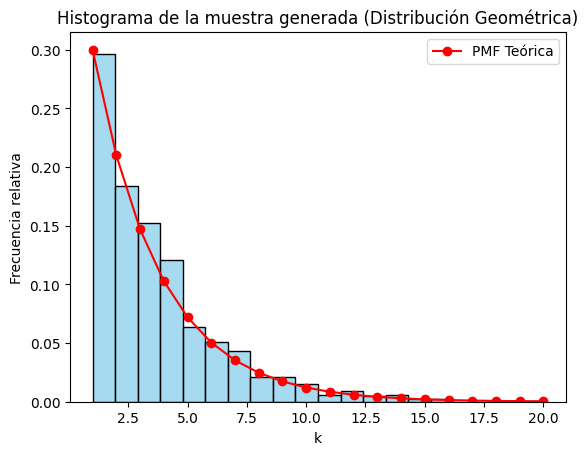

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


p = 0.3


sample_size = 1000


uniform_samples = np.random.uniform(0, 1, sample_size)


geom_samples = np.ceil(np.log(1 - uniform_samples) / np.log(1 - p)).astype(int)


sns.histplot(geom_samples, kde=False, color='skyblue', stat='probability', bins=max(geom_samples) - min(geom_samples) + 1)
plt.title('Histograma de la muestra generada (Distribución Geométrica)')
plt.xlabel('k')
plt.ylabel('Frecuencia relativa')


k_values = np.arange(1, max(geom_samples) + 1)
pmf_theoretical = (1 - p) ** (k_values - 1) * p

plt.plot(k_values, pmf_theoretical, 'r', marker='o', label='PMF Teórica')
plt.legend()
plt.show()


## Task 2
Investigue alguna aplicación del método de transformación inversa e implementenlo.
1. Defina la distribución que está utilizando y los parámetros de la misma
2. Implemente el método de transformación inversa para generar muestras aleatorias a partir de la distribución
3. Genere una muestra aleatoria de tamaño 1000 a partir de la distribución usada
4. Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución usada

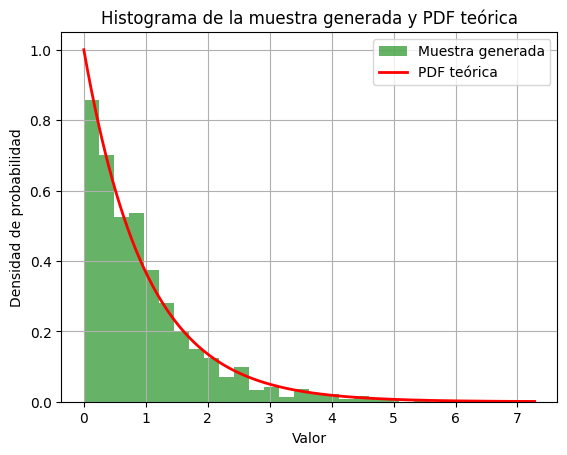

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetro de la distribución exponencial
lambda_param = 1

# Método de transformación inversa
def transformacion_inversa_exponencial(u, lambda_param):
    return -np.log(1 - u) / lambda_param

# Generar una muestra aleatoria de tamaño 1000
n = 1000
uniform_samples = np.random.uniform(0, 1, n)
exponential_samples = transformacion_inversa_exponencial(uniform_samples, lambda_param)

# Graficar el histograma de la muestra generada
plt.hist(exponential_samples, bins=30, density=True, alpha=0.6, color='g', label='Muestra generada')

# Graficar la PDF teórica de la distribución exponencial
x = np.linspace(0, max(exponential_samples), 1000)
pdf_theoretical = lambda_param * np.exp(-lambda_param * x)
plt.plot(x, pdf_theoretical, 'r-', lw=2, label='PDF teórica')

# Configurar la gráfica
plt.title('Histograma de la muestra generada y PDF teórica')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()